In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data = pd.read_csv("housing.csv")

In [32]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [71]:
data.dropna(inplace=True)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [73]:
#We want to train the model on one set of the data and test it with the other set 



In [74]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [75]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [76]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [78]:
train_data = x_train.join(y_train)

In [79]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11925,-117.40,33.95,43.0,633.0,166.0,292.0,135.0,1.1601,INLAND,121400.0
7125,-118.04,33.90,36.0,15.0,5.0,15.0,6.0,0.4999,<1H OCEAN,162500.0
9625,-120.32,37.29,9.0,695.0,188.0,810.0,190.0,1.6172,INLAND,56300.0
9361,-122.53,37.96,36.0,4385.0,620.0,1549.0,626.0,8.3935,NEAR BAY,470500.0
12513,-121.46,38.56,52.0,1878.0,393.0,722.0,381.0,3.3348,INLAND,122800.0
...,...,...,...,...,...,...,...,...,...,...
17245,-119.67,34.42,37.0,1673.0,444.0,1477.0,446.0,2.0643,<1H OCEAN,246700.0
18486,-121.57,36.98,14.0,5231.0,817.0,2634.0,799.0,4.9702,INLAND,279800.0
19995,-119.35,36.19,6.0,958.0,226.0,734.0,230.0,1.0349,INLAND,67800.0
1411,-122.08,37.93,35.0,4043.0,689.0,1832.0,662.0,5.0761,NEAR BAY,233200.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

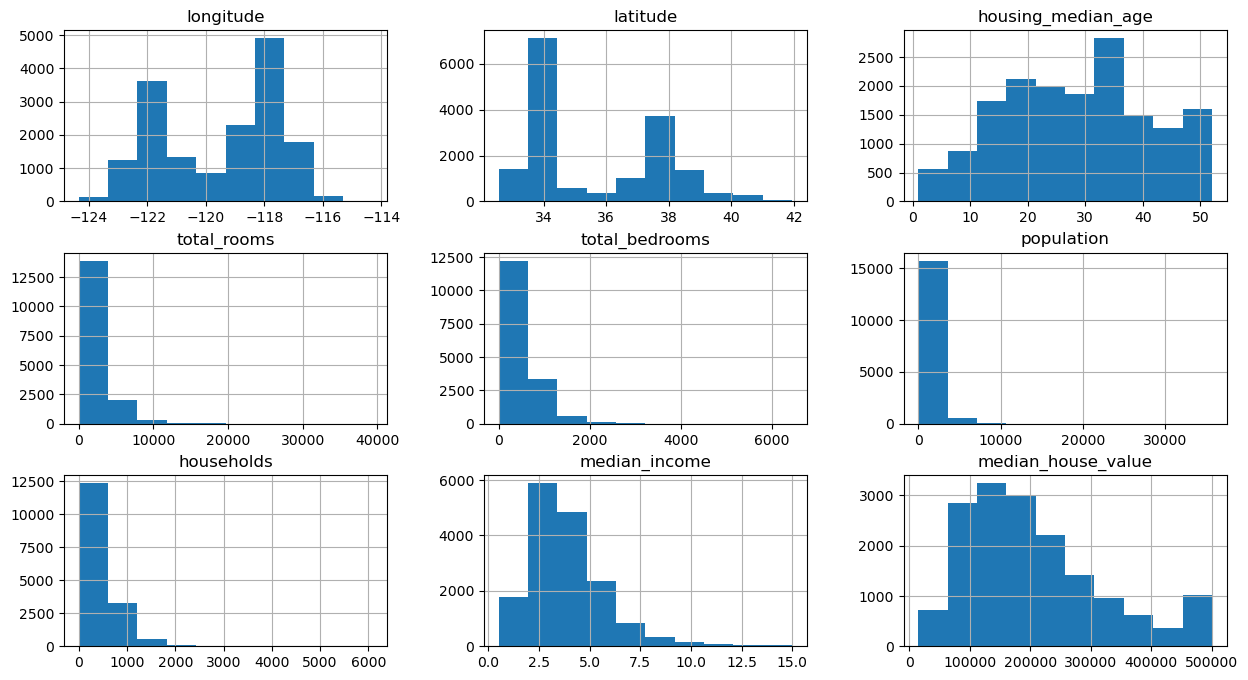

In [80]:
train_data.hist(figsize=(15, 8))

In [81]:
train_data.corr() #correlation Matrix 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923540,-0.111382,0.043490,0.066611,0.097656,0.053113,-0.016716,-0.051269
latitude,-0.923540,1.000000,0.014233,-0.036318,-0.065586,-0.108630,-0.070804,-0.080381,-0.140999
housing_median_age,-0.111382,0.014233,1.000000,-0.363414,-0.322629,-0.294389,-0.304441,-0.112376,0.116803
total_rooms,0.043490,-0.036318,-0.363414,1.000000,0.929552,0.849054,0.917009,0.195021,0.129646
total_bedrooms,0.066611,-0.065586,-0.322629,0.929552,1.000000,0.871029,0.978457,-0.012816,0.044403
population,0.097656,-0.108630,-0.294389,0.849054,0.871029,1.000000,0.902417,0.000400,-0.031598
households,0.053113,-0.070804,-0.304441,0.917009,0.978457,0.902417,1.000000,0.008782,0.060413
median_income,-0.016716,-0.080381,-0.112376,0.195021,-0.012816,0.000400,0.008782,1.000000,0.689199
median_house_value,-0.051269,-0.140999,0.116803,0.129646,0.044403,-0.031598,0.060413,0.689199,1.000000


<AxesSubplot:>

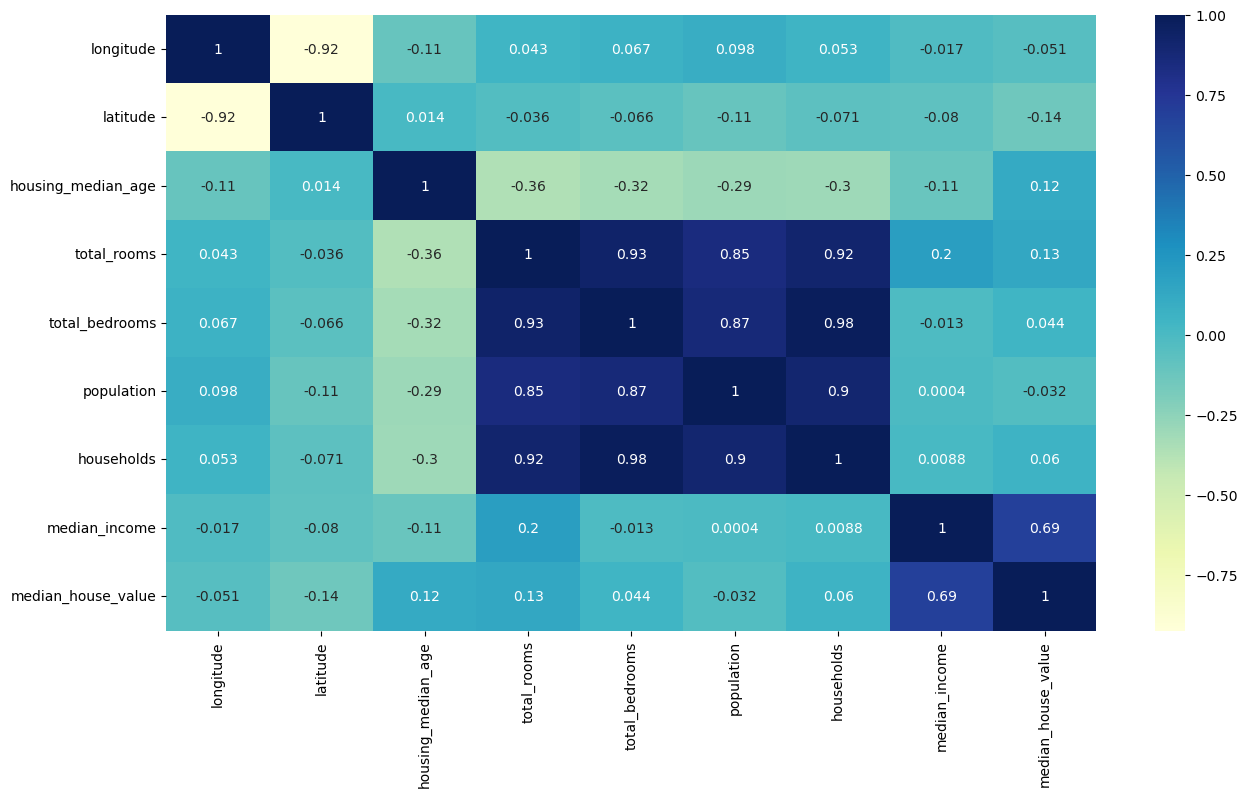

In [82]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [83]:
train_data['total_rooms']= np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']= np.log(train_data['total_bedrooms']+1)
train_data['population']= np.log(train_data['population']+1)
train_data['households']= np.log(train_data['households']+1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

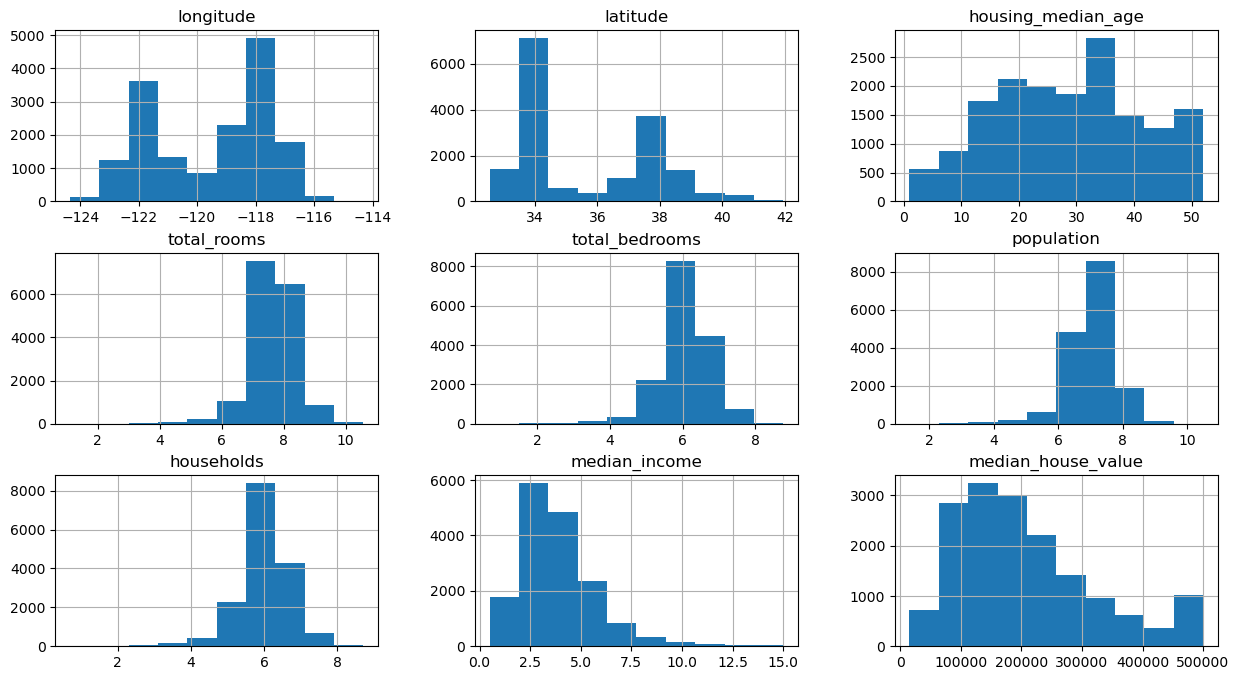

In [84]:
train_data.hist(figsize=(15,8))

In [85]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7219
INLAND        5210
NEAR OCEAN    2090
NEAR BAY      1824
ISLAND           3
Name: ocean_proximity, dtype: int64

In [86]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
#get_dummies will replace the values with 0 and 1 

In [87]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11925,-117.40,33.95,43.0,6.452049,5.117994,5.680173,4.912655,1.1601,121400.0,0,1,0,0,0
7125,-118.04,33.90,36.0,2.772589,1.791759,2.772589,1.945910,0.4999,162500.0,1,0,0,0,0
9625,-120.32,37.29,9.0,6.545350,5.241747,6.698268,5.252273,1.6172,56300.0,0,1,0,0,0
9361,-122.53,37.96,36.0,8.386173,6.431331,7.346010,6.440947,8.3935,470500.0,0,0,0,1,0
12513,-121.46,38.56,52.0,7.538495,5.976351,6.583409,5.945421,3.3348,122800.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17245,-119.67,34.42,37.0,7.422971,6.098074,7.298445,6.102559,2.0643,246700.0,1,0,0,0,0
18486,-121.57,36.98,14.0,8.562549,6.706862,7.876638,6.684612,4.9702,279800.0,0,1,0,0,0
19995,-119.35,36.19,6.0,6.865891,5.424950,6.599870,5.442418,1.0349,67800.0,0,1,0,0,0
1411,-122.08,37.93,35.0,8.304990,6.536692,7.513709,6.496775,5.0761,233200.0,0,0,0,1,0


<AxesSubplot:>

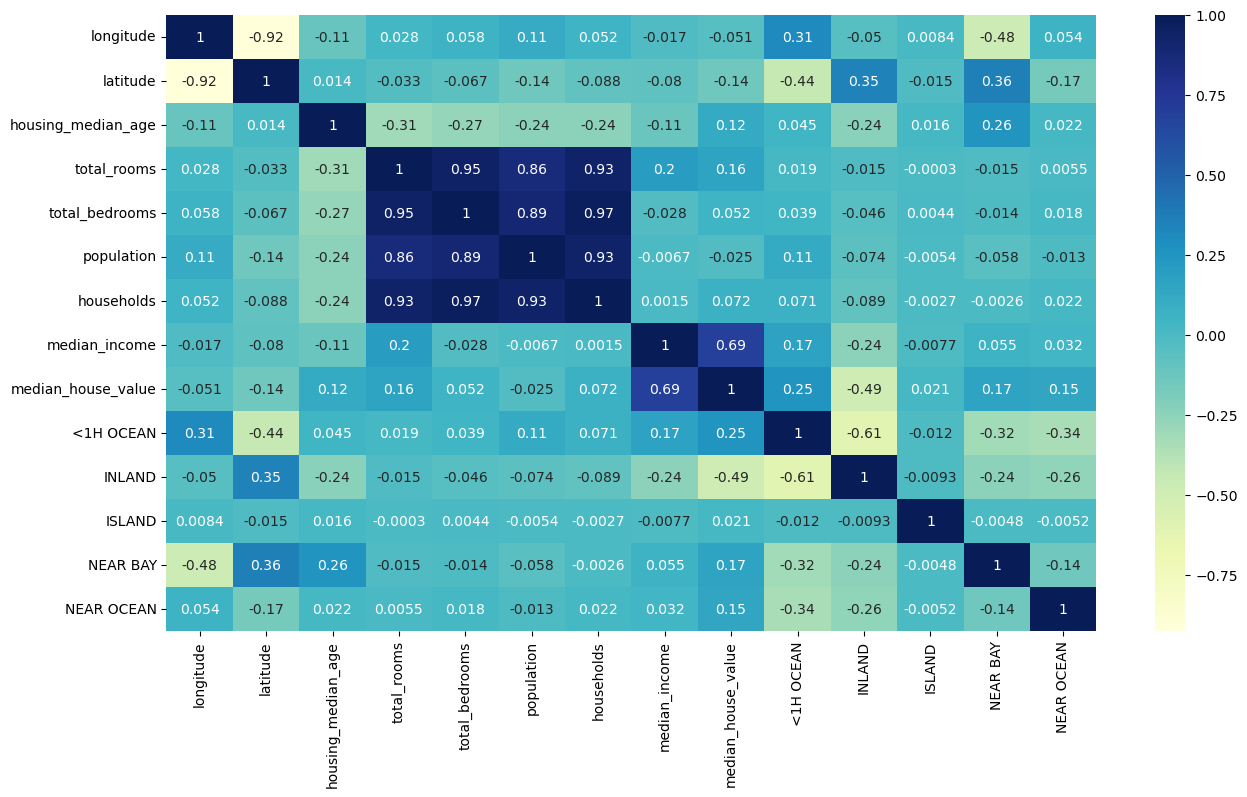

In [88]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

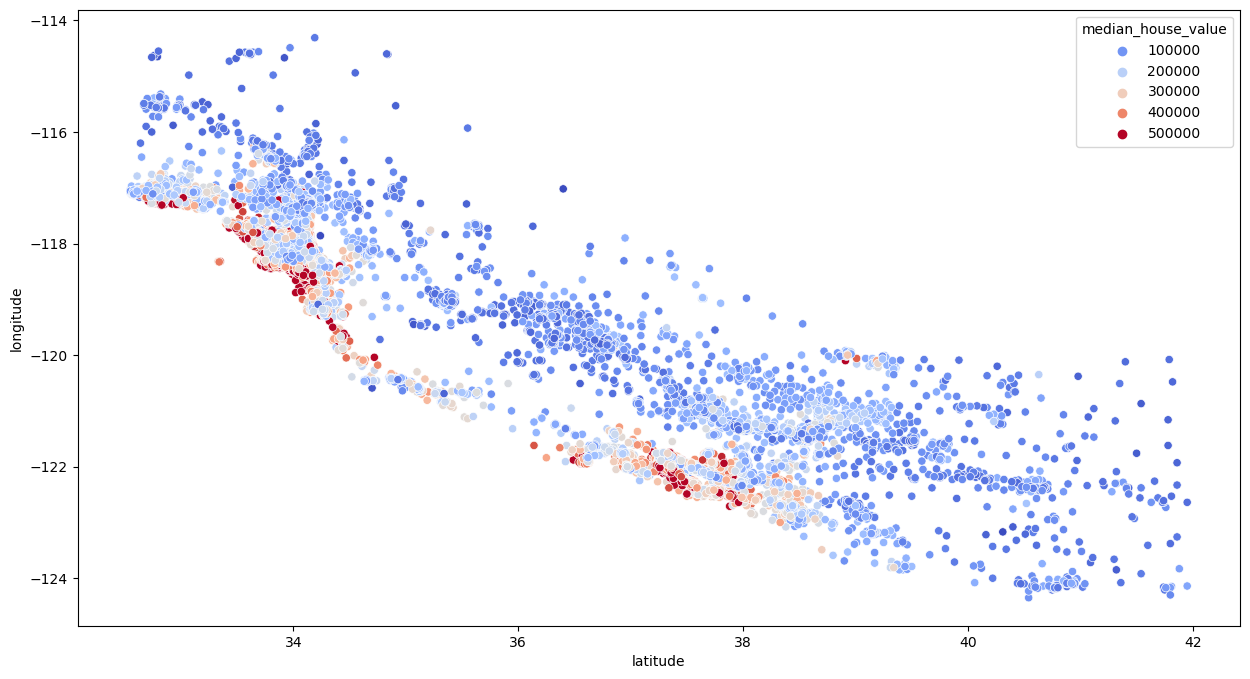

In [89]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x = 'latitude', y ='longitude', data=train_data, hue ='median_house_value', palette='coolwarm')

#More red more expensive 
#Also looks like california 

In [90]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_room'] = train_data['total_rooms'] / train_data['households']
#we use this to find out how many of the rooms in the house are bedrooms 

<AxesSubplot:>

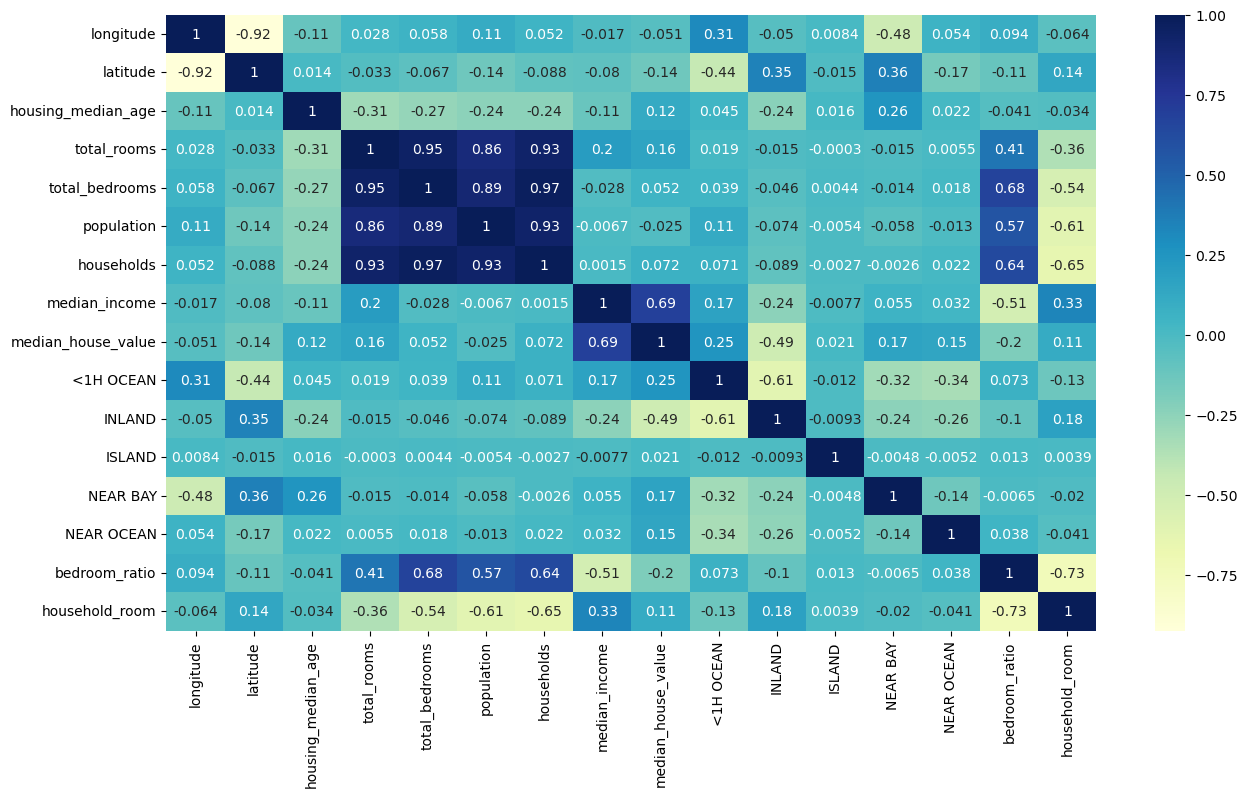

In [91]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [92]:
#Linear Regression Model

In [93]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis= 1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)


reg = LinearRegression()

reg.fit(x_train_s, y_train)

LinearRegression()

In [94]:
test_data = x_test.join(y_test)

test_data['total_rooms']= np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']= np.log(test_data['total_bedrooms']+1)
test_data['population']= np.log(test_data['population']+1)
test_data['households']= np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_room'] = test_data['total_rooms'] / test_data['households']



In [95]:
x_test, y_test = test_data.drop(['median_house_value'], axis= 1), test_data['median_house_value']

In [96]:
x_test_s = scaler.transform(x_test)

In [98]:
reg.score(x_test_s,y_test)

0.658412316720351

In [103]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [104]:
forest.score(x_test_s, y_test)

0.80686162476405

In [111]:
#using a grid search with cross validation(we can spilt it into k folds and we use all but to train and one to evaluate)

from sklearn.model_selection import GridSearchCV

forest= RandomForestRegressor()

param_grid = {
    'n_estimators': [100,200,300],
    'min_samples_split': [2,4],
    'max_depth': [None, 4, 8]
    
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                          scoring = 'neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(x_train_s, y_train)

/Users/brandonram/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/brandonram/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/brandonram/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/brandonram/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_b

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 20],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [112]:
best_forest = grid_search.best_estimator_
best_forest

RandomForestRegressor(max_features=8)

In [109]:
best_forest.score(x_test_s, y_test)

0.8049595570846679